In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Read in the data
df_2020 = pd.read_csv('2020_data.csv')
df_2021 = pd.read_csv('2021_data.csv')
df_2022 = pd.read_csv('2022_data.csv')

# Calculate the average cost of living index for each year
avg_2020 = df_2020['Cost of Living Index'].mean()
avg_2021 = df_2021['Cost of Living Index'].mean()
avg_2022 = df_2022['Cost of Living Index'].mean()
data = pd.concat([df_2020 , df_2021 , df_2022])
print(data)

     Rank      Country  Cost of Living Index  Rent Index  \
0       1      Bermuda                147.77       85.70   
1       2  Switzerland                125.69       51.20   
2       3       Norway                 96.80       32.61   
3       4      Iceland                 90.19       38.54   
4       5        Japan                 86.22       26.18   
..    ...          ...                   ...         ...   
134   135    Venezuela                 43.20        9.99   
135   136      Vietnam                 37.48       13.22   
136   137        Yemen                 53.14        6.71   
137   138       Zambia                 33.04        9.26   
138   139     Zimbabwe                 45.68        8.75   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                            117.54           146.63                  152.52   
1                             89.41           124.93                  118.55   
2                             65.54    

In [3]:
# Define the regions for each country
africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
the_caribbean = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Dominica', 'Dominican Republic', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 'Trinidad and Tobago']
central_america = ['Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama']
Europe = ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Macedonia", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom"]
north_america = ['Bahamas', 'Barbados', 'Bermuda', 'Canada', 'Costa Rica', 'Cuba', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Trinidad and Tobago', 'United States']
south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'South Georgia and South Sandwich Islands', 'Suriname', 'Uruguay', 'Venezuela']
oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

data['region']=""

for index, row in data.iterrows():
    country = row['Country']
    if country in africa:
        data.at[index, 'region'] = 'Africa'
    elif country in asia:
        data.at[index, 'region'] = 'Asia'
    elif country in the_caribbean:
        data.at[index, 'region'] = 'The Caribbean'
    elif country in central_america:
        data.at[index, 'region'] = 'Central America'
    elif country in Europe:
        data.at[index, 'region'] = 'Europe'
    elif country in north_america:
        data.at[index, 'region'] = 'North America'
    elif country in oceania:
        data.at[index, 'region'] = 'Oceania'
    elif country in south_america:
        data.at[index, 'region'] = 'South America'


Text(0, 0.5, 'Country')

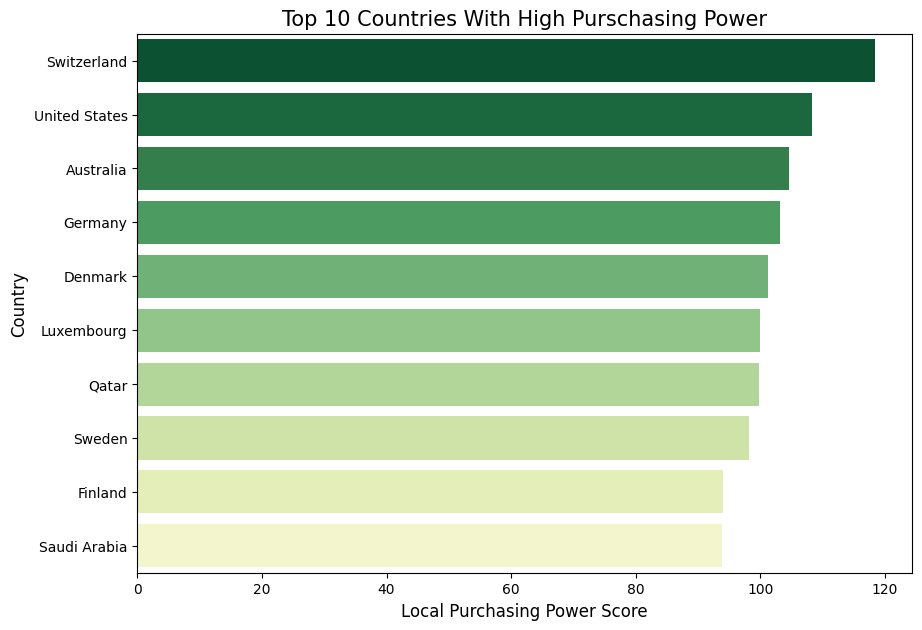

In [4]:
purschase_power = data.groupby('Country')['Local Purchasing Power Index'].max().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,7))
sns.barplot(y=purschase_power['Country'], x=purschase_power['Local Purchasing Power Index'], palette='YlGn_r', orient='h')
plt.title('Top 10 Countries With High Purschasing Power', fontsize=15)
plt.xlabel('Local Purchasing Power Score', fontsize=12)
plt.ylabel('Country', fontsize=12)

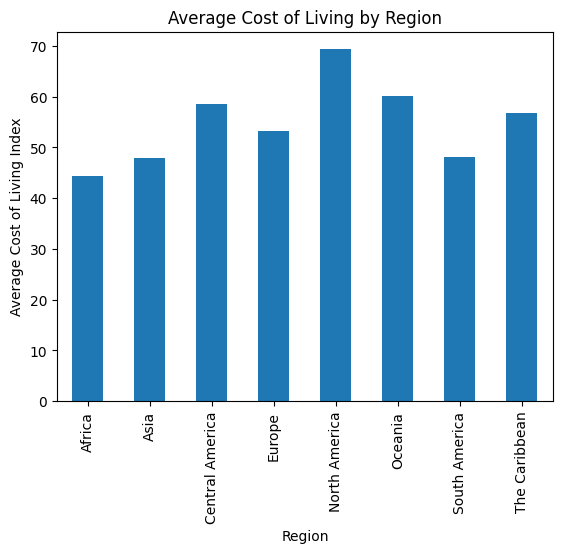

In [5]:
# Calculate the average cost of living by region
average_cost_by_region = data.groupby('region')['Cost of Living Index'].mean()

# Visualize the average cost of living by region
average_cost_by_region.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Average Cost of Living Index')
plt.title('Average Cost of Living by Region')
plt.show()

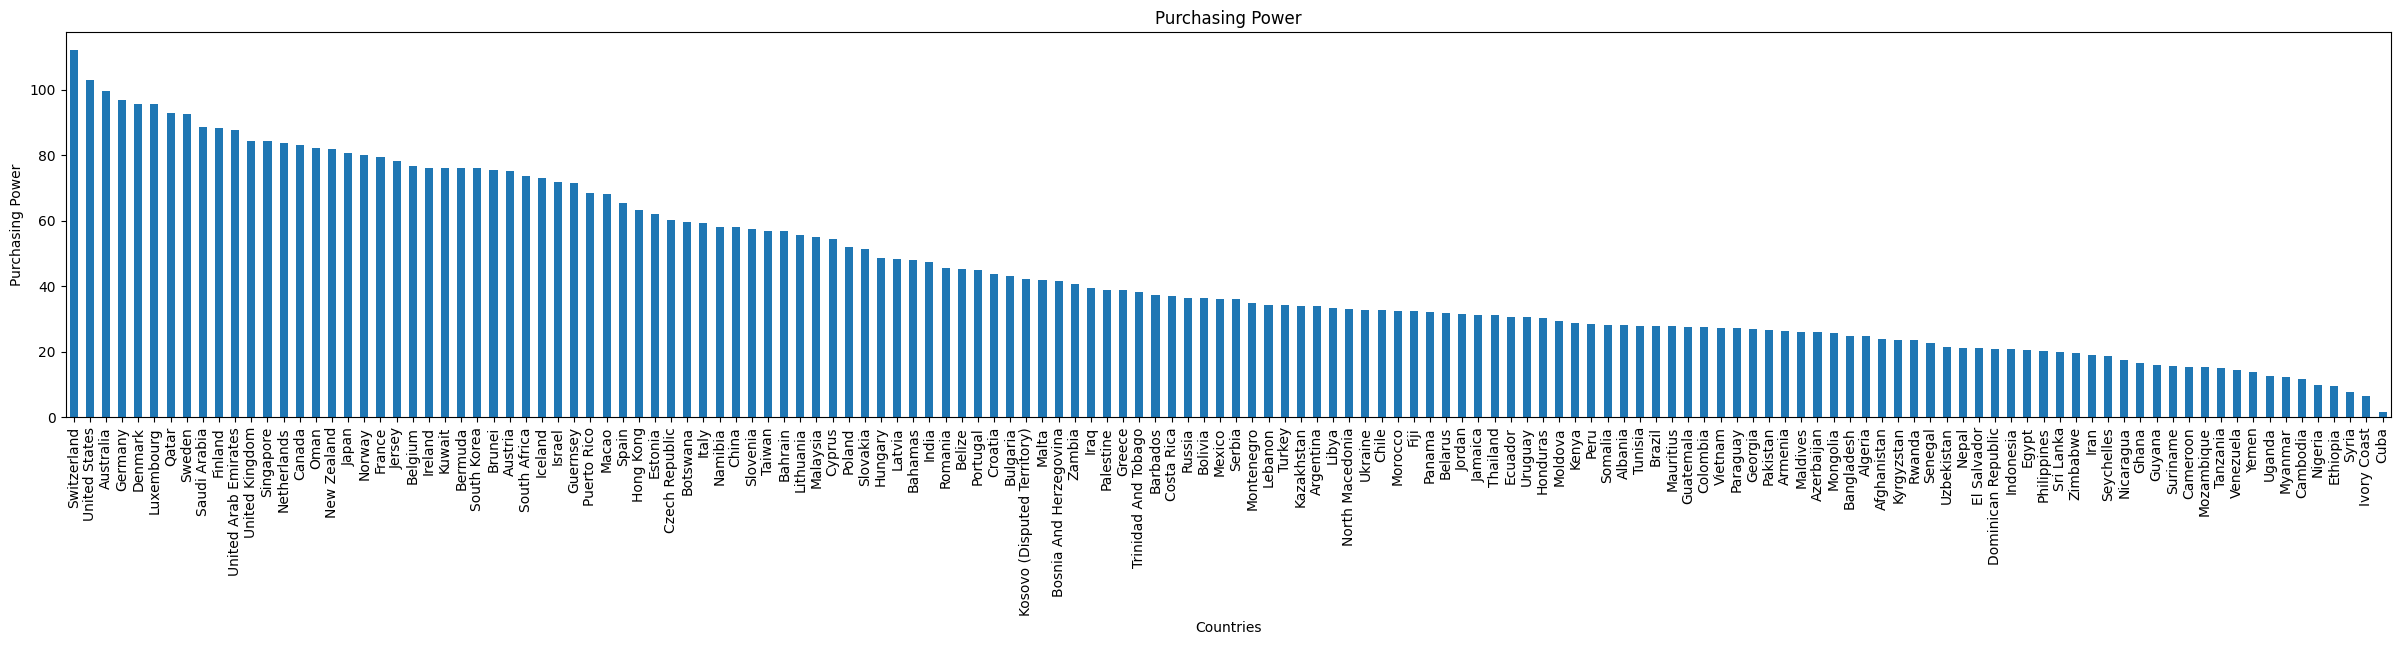

In [6]:
purchasing_power = data.groupby('Country')['Local Purchasing Power Index'].mean().sort_values(ascending=False)
# Visualize the average cost of living by region
#plt.bar(data['Country'], data['Local Purchasing Power Index'], color ='maroon')
plt.figure(figsize=(30, 5))
purchasing_power.plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Purchasing Power')
plt.title('Purchasing Power')

plt.show()

In [7]:
# Create a list of the years and the corresponding average cost of living indices
years = np.array([2020, 2021, 2022]).reshape(-1, 1)
cost_of_living_indices = np.array([avg_2020, avg_2021, avg_2022]).reshape(-1, 1)

# Use linear regression to fit a model to the data
model = LinearRegression()
model.fit(years, cost_of_living_indices)

LinearRegression()

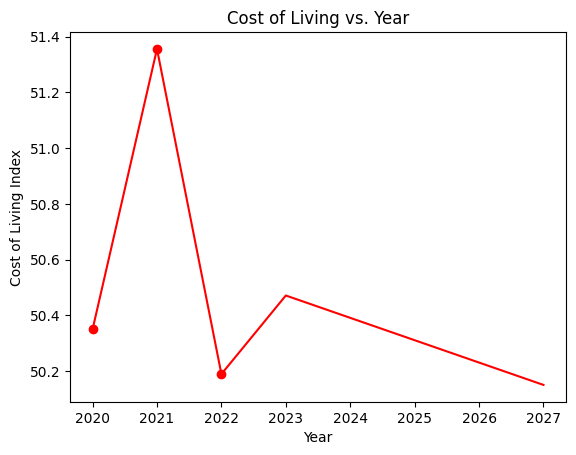

In [8]:

# Use the model to predict the average cost of living index for the next five years
predicted_years = np.array([[2023], [2024], [2025], [2026], [2027]])
predicted_indices = model.predict(predicted_years)

# Plot the data and the prediction
plt.scatter(years, cost_of_living_indices, color='red')
plt.plot(np.concatenate((years, predicted_years)), np.concatenate((cost_of_living_indices, predicted_indices)), color='red')
plt.title('Cost of Living vs. Year')
plt.xlabel('Year')
plt.ylabel('Cost of Living Index')
plt.show()


C:\Users\hemre\AppData\Local\Temp\ipykernel_11320\2982662560.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.iloc[:].corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)


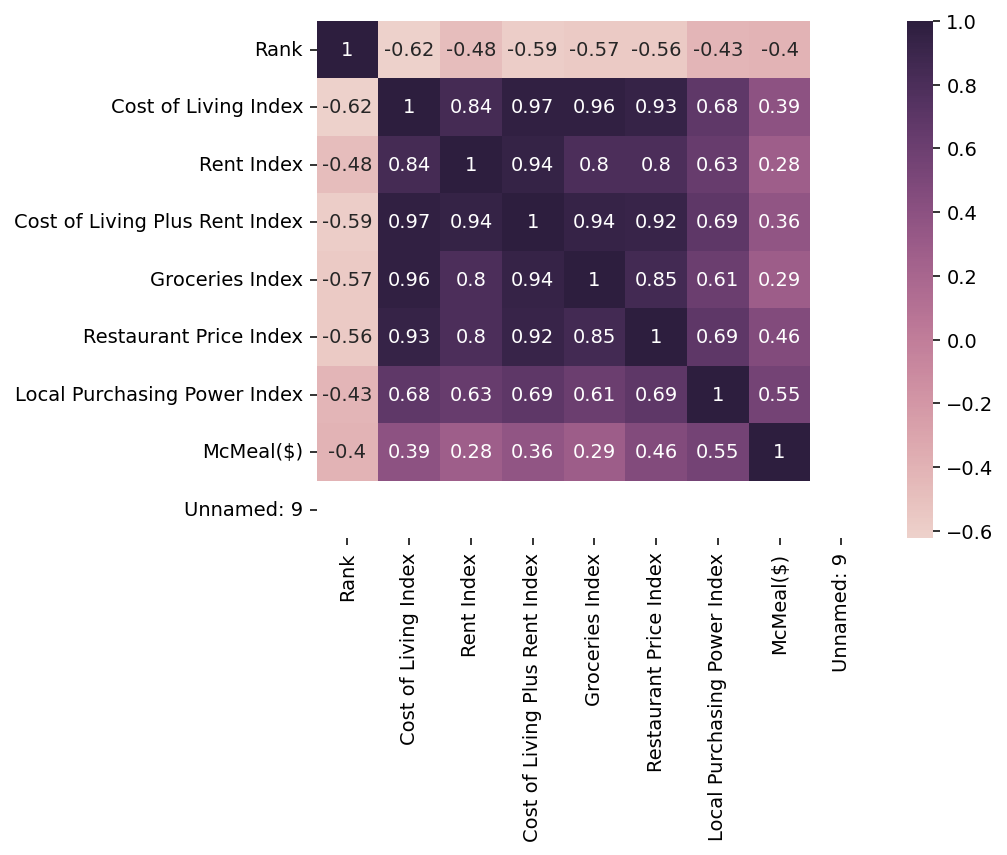

In [9]:
plt.figure(dpi=140)
sns.heatmap(data.iloc[:].corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
plt.show()